In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [35]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']="b06d525a9f66198051ccb648b091778a"

In [36]:
!kaggle competitions download -c 2021-ml-midterm-p5

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submit.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)


In [37]:
!unzip '*.zip'

Archive:  train.csv.zip
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [79]:
train=pd.read_csv('train.csv',index_col=0)
test=pd.read_csv('test.csv',index_col=0)
sample=pd.read_csv('sample_submit.csv',index_col=0)


In [7]:
train.head()

,index,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
3,4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
4,5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0


분류문제를 사용할 것임

- 로지스틱 회귀
- knn classification
- 랜덤포레스트 분류
- xgboost 분류

In [78]:
#float형식을 int형식으로 바꾸어주기
train=train.astype({'target':'int'})

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   15326 non-null  int64  
 1   enrollee_id             15326 non-null  int64  
 2   city                    15326 non-null  object 
 3   city_development_index  15326 non-null  float64
 4   gender                  11752 non-null  object 
 5   relevent_experience     15326 non-null  object 
 6   enrolled_university     15009 non-null  object 
 7   education_level         14964 non-null  object 
 8   major_discipline        13068 non-null  object 
 9   experience              15276 non-null  object 
 10  company_size            10612 non-null  object 
 11  company_type            10445 non-null  object 
 12  last_new_job            14983 non-null  object 
 13  training_hours          15326 non-null  int64  
 14  target                  15326 non-null

## EDA

In [27]:
train.columns

Index(['index', 'enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [28]:
train['city'].value_counts()[:10]

city_103    3493
city_21     2128
city_16     1248
city_114    1062
city_160     679
city_136     459
city_67      347
city_75      251
city_102     243
city_104     243
Name: city, dtype: int64

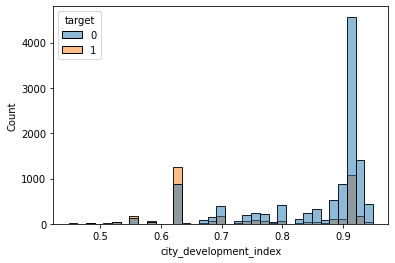

In [32]:
sns.histplot(train,x='city_development_index',hue='target')

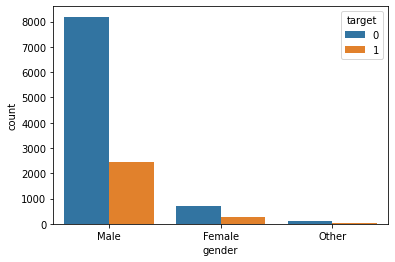

In [31]:
sns.countplot(data=train,x='gender',hue='target')

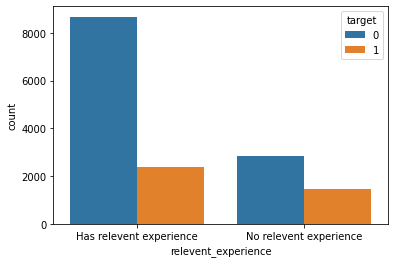

In [34]:
sns.countplot(data=train,x='relevent_experience',hue='target')

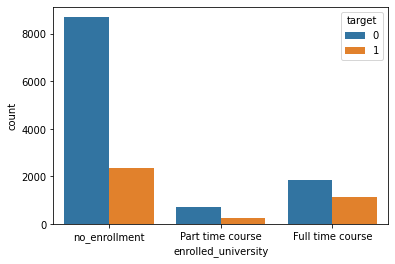

In [35]:
sns.countplot(data=train,x='enrolled_university',hue='target')

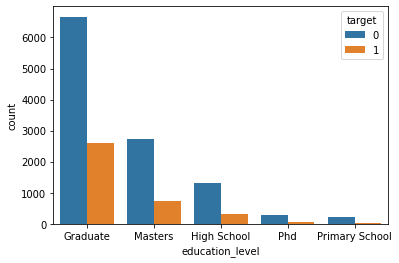

In [36]:
sns.countplot(data=train,x='education_level',hue='target')


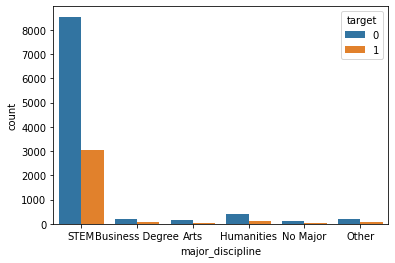

In [37]:
sns.countplot(data=train,x='major_discipline',hue='target')


'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'

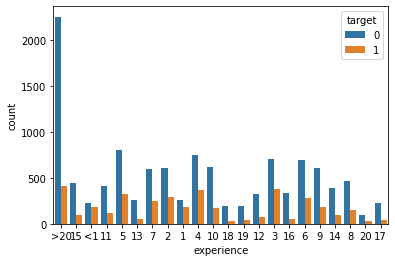

In [40]:
sns.countplot(data=train,x='experience',hue='target')

In [64]:
train['experience'].value_counts()

>20    2664
5      1131
4      1113
3      1094
6       977
2       902
7       842
10      784
9       781
8       617
15      540
11      535
14      486
1       442
<1      409
12      394
16      389
13      314
17      271
19      233
18      230
20      128
Name: experience, dtype: int64

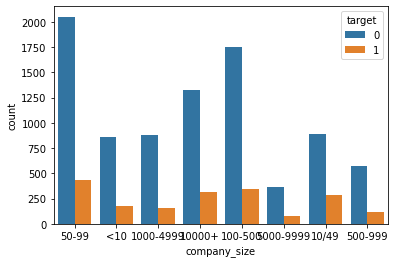

In [41]:
sns.countplot(data=train,x='company_size',hue='target')

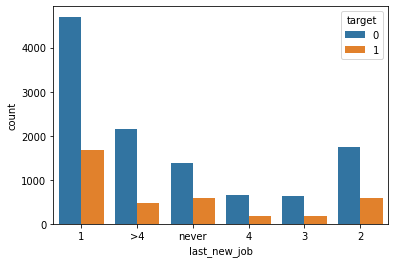

In [42]:
sns.countplot(data=train,x='last_new_job',hue='target')

In [45]:
train['training_hours'].value_counts()[:10]


28    266
18    241
12    228
50    224
22    220
20    218
34    217
21    217
6     216
24    215
Name: training_hours, dtype: int64

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15326 entries, 0 to 15325
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   15326 non-null  int64  
 1   enrollee_id             15326 non-null  int64  
 2   city                    15326 non-null  object 
 3   city_development_index  15326 non-null  float64
 4   gender                  11752 non-null  object 
 5   relevent_experience     15326 non-null  object 
 6   enrolled_university     15009 non-null  object 
 7   education_level         14964 non-null  object 
 8   major_discipline        13068 non-null  object 
 9   experience              15276 non-null  object 
 10  company_size            10612 non-null  object 
 11  company_type            10445 non-null  object 
 12  last_new_job            14983 non-null  object 
 13  training_hours          15326 non-null  int64  
 14  target                  15326 non-null

In [47]:
train.columns

Index(['index', 'enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

## 전처리


일단 문자열을 인코딩 시켜야겠음

## onehotencoder

In [80]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_cat = ohe.fit_transform(train[[ 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']])
test_cat=ohe.transform(test[[ 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']])

In [81]:
train_cat=pd.DataFrame(train_cat)
test_cat=pd.DataFrame(test_cat)

In [47]:
train_cat.shape

(15326, 69)

In [82]:
train_cat1=pd.get_dummies(train[[ 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']])

test_cat1=pd.get_dummies(test[[ 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job']])

In [85]:
train_1=train[['city','enrollee_id', 'city_development_index', 'training_hours']]
y_train=train['target']

In [86]:
test_1=test[['city','enrollee_id', 'city_development_index', 'training_hours']]

city에서 오류가 생겨서 얘는 음.. 어카지 걍 삭제할까. ...?,,,ㅠㅜㅠㅜㅠㅠㅜㅠㅜㅠ

In [87]:
X_train=pd.concat([train_cat1,train_1],axis=1)
X_test=pd.concat([test_cat1,test_1],axis=1)

In [88]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))

(15326, 65)
(15326,)
(3832, 65)


## City는 drop

In [89]:
X_train=X_train.drop('city',axis=1)
X_test=X_test.drop('city',axis=1)

In [90]:
print(np.shape(X_train))
print(np.shape(y_train))
print(np.shape(X_test))

(15326, 64)
(15326,)
(3832, 64)


In [91]:
X_train

,gender_Female,gender_Male,gender_Other,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,education_level_Graduate,education_level_High School,education_level_Masters,education_level_Phd,education_level_Primary School,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,experience_1,experience_10,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never,enrollee_id,city_development_index,training_hours
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8949,0.920,36
1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,29725,0.776,47
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,33241,0.789,52
4,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,666,0.767,8
5,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,21651,0.764,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19152,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,29754,0.920,25
19153,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,7386,0.878,42
19154,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,31398,0.920,52


# 모델링

로지스틱 회귀
knn classification
랜덤포레스트 분류
xgboost 분류

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier()
rf_clf=RandomForestClassifier()
#xgb_clf=XGBClassifier()

lr_clf.fit(X_train,y_train)
knn_clf.fit(X_train,y_train)
rf_clf.fit(X_train,y_train)
#xgb_clf.fit(X_train,y_train)

lr_pred=lr_clf.predict(X_test)
knn_pred=knn_clf.predict(X_test)
rf_pred=rf_clf.predict(X_test)
#xgb_pred=xgb_clf.predict(X_test)


In [94]:
lr_sample=sample.copy()
knn_sample=sample.copy()
rf_sample=sample.copy()


lr_sample['target']=lr_pred
lr_sample.to_csv('lr.csv')

knn_sample['target']=knn_pred
knn_sample.to_csv('knn.csv')

rf_sample['target']=rf_pred
rf_sample.to_csv('rf.csv')

In [95]:
lr_sample

,target
index,
2,0.0
9,0.0
10,1.0
11,0.0
15,0.0
...,...
19129,0.0
19132,0.0
19135,0.0
